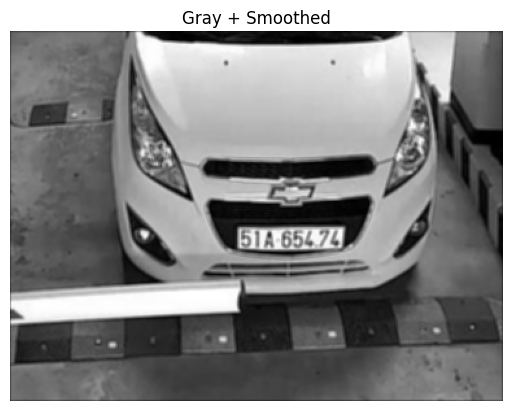

Tìm thấy 4578 ảnh trong thư mục D:\XLA\bsx_raw
[1/4578] Đã xử lý xong: carlong_0001.png
[2/4578] Đã xử lý xong: carlong_0002.png
[3/4578] Đã xử lý xong: carlong_0003.png
[4/4578] Đã xử lý xong: carlong_0004.png
[5/4578] Đã xử lý xong: carlong_0005.png
[6/4578] Đã xử lý xong: carlong_0006.png
[7/4578] Đã xử lý xong: carlong_0007.png
[8/4578] Đã xử lý xong: carlong_0008.png
[9/4578] Đã xử lý xong: carlong_0009.png
[10/4578] Đã xử lý xong: carlong_0010.png
[11/4578] Đã xử lý xong: carlong_0011.png
[12/4578] Đã xử lý xong: carlong_0012.png
[13/4578] Đã xử lý xong: carlong_0013.png
[14/4578] Đã xử lý xong: carlong_0014.png
[15/4578] Đã xử lý xong: carlong_0015.png
[16/4578] Đã xử lý xong: carlong_0016.png
[17/4578] Đã xử lý xong: carlong_0017.png
[18/4578] Đã xử lý xong: carlong_0018.png
[19/4578] Đã xử lý xong: carlong_0019.png
[20/4578] Đã xử lý xong: carlong_0020.png
[21/4578] Đã xử lý xong: carlong_0021.png
[22/4578] Đã xử lý xong: carlong_0022.png
[23/4578] Đã xử lý xong: carlong_0023.

In [ ]:
# import 
import os
import glob
import cv2
import numpy as np

# -----------------------------
# 1. Hàm chuyển BGR -> Grayscale tự cài
# -----------------------------
def bgr_to_gray_manual(bgr_img):
    """
    bgr_img: ảnh BGR (H, W, 3) đọc từ cv2
    return: ảnh xám (H, W) kiểu float64
    """
    # Tách kênh B, G, R
    B = bgr_img[:, :, 0].astype(np.float64)
    G = bgr_img[:, :, 1].astype(np.float64)
    R = bgr_img[:, :, 2].astype(np.float64)

    # Công thức chuẩn: Gray = 0.299R + 0.587G + 0.114B
    gray = 0.114 * B + 0.587 * G + 0.299 * R

    # Clip lại 0–255 và chuyển về uint8
    gray = np.clip(gray, 0, 255).astype(np.uint8)
    return gray

# -----------------------------
# 2. Hàm padding ảnh
# -----------------------------
def pad_image(img, pad_height, pad_width):
    """
    Pad 0 xung quanh ảnh để phục vụ tích chập.
    """
    H, W = img.shape
    padded = np.zeros((H + 2 * pad_height, W + 2 * pad_width), dtype=img.dtype)
    padded[pad_height:pad_height + H, pad_width:pad_width + W] = img
    return padded

# -----------------------------
# 3. Hàm lọc trung bình 3x3 (mean filter) tự cài
# -----------------------------
def mean_filter_3x3(gray_img):
    """
    Áp dụng lọc trung bình 3x3 cho ảnh xám.
    Không dùng cv2.filter2D, tự cài bằng NumPy + for.
    """
    H, W = gray_img.shape
    # Kernel trung bình 3x3
    kernel = np.ones((3, 3), dtype=np.float64) / 9.0

    # Pad ảnh
    padded = pad_image(gray_img, 1, 1)

    # Ảnh output
    output = np.zeros_like(gray_img, dtype=np.float64)

    # Tích chập thủ công
    for i in range(H):
        for j in range(W):
            region = padded[i:i+3, j:j+3].astype(np.float64)
            output[i, j] = np.sum(region * kernel)

    # Clip lại 0–255 & về uint8
    output = np.clip(output, 0, 255).astype(np.uint8)
    return output

# -----------------------------
# 4. Hàm xử lý 1 ảnh: đọc -> xám -> làm mịn
# -----------------------------
def preprocess_image(input_path):
    """
    input_path: đường dẫn đến file ảnh (png, jpg, ...)
    return: ảnh xám đã làm mịn (numpy array)
    """
    # Đọc ảnh màu (BGR)
    bgr = cv2.imread(input_path)
    if bgr is None:
        raise FileNotFoundError(f"Không đọc được ảnh: {input_path}")

    # Chuyển xám (tự cài)
    gray = bgr_to_gray_manual(bgr)

    # Lọc trung bình 3x3 (giảm nhiễu, làm mịn)
    smooth = mean_filter_3x3(gray)

    return smooth

# -----------------------------
# 5. Hàm xử lý TẤT CẢ ảnh trong thư mục train
# -----------------------------
def preprocess_all_images(
    input_dir=r"D:\XLA\bsx_raw",
    output_dir=r"D:\XL\bsx_processed"
):
    # Tạo thư mục output nếu chưa có
    os.makedirs(output_dir, exist_ok=True)

    # Lấy tất cả file PNG (bạn có thể thêm *.jpg nếu cần)
    image_paths = glob.glob(os.path.join(input_dir, "*.png"))

    print(f"Tìm thấy {len(image_paths)} ảnh trong thư mục {input_dir}")

    for idx, img_path in enumerate(image_paths, start=1):
        try:
            smooth_img = preprocess_image(img_path)

            # Tên file gốc
            filename = os.path.basename(img_path)
            # Đường dẫn lưu ảnh đã xử lý
            out_path = os.path.join(output_dir, filename)

            # Lưu ảnh xám đã làm mịn
            cv2.imwrite(out_path, smooth_img)

            print(f"[{idx}/{len(image_paths)}] Đã xử lý xong: {filename}")
        except Exception as e:
            print(f"Lỗi khi xử lý {img_path}: {e}")

# -----------------------------
# 6. Ví dụ chạy
# -----------------------------
if __name__ == "__main__":
    # Nếu muốn test riêng 1 ảnh:
    test_path = r"D:\XLA\bsx_raw\carlong_0004.png"
    out_img = preprocess_image(test_path)
    from matplotlib import pyplot as plt

    plt.imshow(out_img, cmap='gray')
    plt.title("Gray + Smoothed")
    plt.axis("off")
    plt.show()

    # Xử lý tất cả ảnh trong thư mục train
    preprocess_all_images()

